# Handwritten Digit Recognition  Machine Learning Project

Handwritten Digit Recognition using the MNIST database
 https://en.wikipedia.org/wiki/MNIST_database

# Overview

This notebook contains the code and materials for a machine learning assignment focused on analyzing the MNIST dataset using a Convolutional Neural Network (CNN) implemented in Google Colab. The Project aims to assess proficiency in advanced machine learning techniques, the ability to critically evaluate research methodologies, and effectiveness in collaborative data analysis tasks. These objectives are essential for demonstrating mastery in these areas.

# Dataset
The MNIST dataset, consisting of 60,000 training images and 10,000 test images of handwritten digits (0-9), is used for training and evaluating the machine learning model.

## The Data source is kaggle.
https://www.kaggle.com/datasets/hojjatk/mnist-dataset

# Dataset Location
The dataset was uploaded to Google Drive and is located in the mnist_dataset folder.

## The folder contains the following files:

train-images-idx3-ubyte: Training images file

train-labels-idx1-ubyte: Training labels file

t10k-images-idx3-ubyte: Test images file

t10k-labels-idx1-ubyte: Test labels file

#Setup and Execution
To execute the code and run the project, follow these steps:


Upload the mnist_dataset folder containing the MNIST dataset files to your Google Drive.
Open and run the Jupyter Notebook in Google colab.

#Results and Analysis
The project includes various analyses, including model training, evaluation, error analysis, and visualizations. The results and findings are presented in this Jupyter Notebook.

In [ ]:
# This code imports the drive module from the google.colab library and mounts Google Drive to the Colab environment.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This line of code defines the dataset_path variable, which stores the path to the directory where the MNIST dataset is located within your Google Drive.

The path '/content/drive/My Drive/mnist_dataset' specifies the location of the dataset directory relative to the root directory of the Google Drive. Make sure that the path is correctly set to the directory where the MNIST dataset files are stored.


In [ ]:
dataset_path = '/content/drive/My Drive/mnist_dataset'

This code defines a MnistDataloader class which will load the MNIST dataset.

This class provides an easy way to load the MNIST dataset for training machine learning models. It also ensures that the dataset is loaded correctly and is ready for use in training machine learning model.







In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations
import struct  # For unpacking binary data
from array import array  # For efficient array operations
from os.path import join  # For joining file paths

# Define a class for loading the MNIST dataset
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):

        # Initialize file paths for training and test data
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

     # Method to read images and labels from file paths
    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []  # Initialize empty list for labels
        # Open labels file in binary mode
        with open(labels_filepath, 'rb') as file:
           # Read magic number and size of labels
            magic, size = struct.unpack(">II", file.read(8))
            # Check if magic number matches the expected value for labels
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            # Read label data and store in array
            labels = array("B", file.read())

       # Initialize empty list for images
        images = []
        # Open images file in binary mode
        with open(images_filepath, 'rb') as file:
            # Read magic number, size, rows, and columns of images
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            # Check if magic number matches the expected value for images
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            # Read image data and store in array
            image_data = array("B", file.read())
        # Reshape image data into 28x28 arrays and store in images list
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images.append(img)

        return images, labels

    # Method to load training and test data
    def load_data(self):
        # Load training images and labels
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        # Load test images and labels
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)

This code verifies the reading of the MNIST dataset using the MnistDataloader class and shows some random training and test images along with their labels.

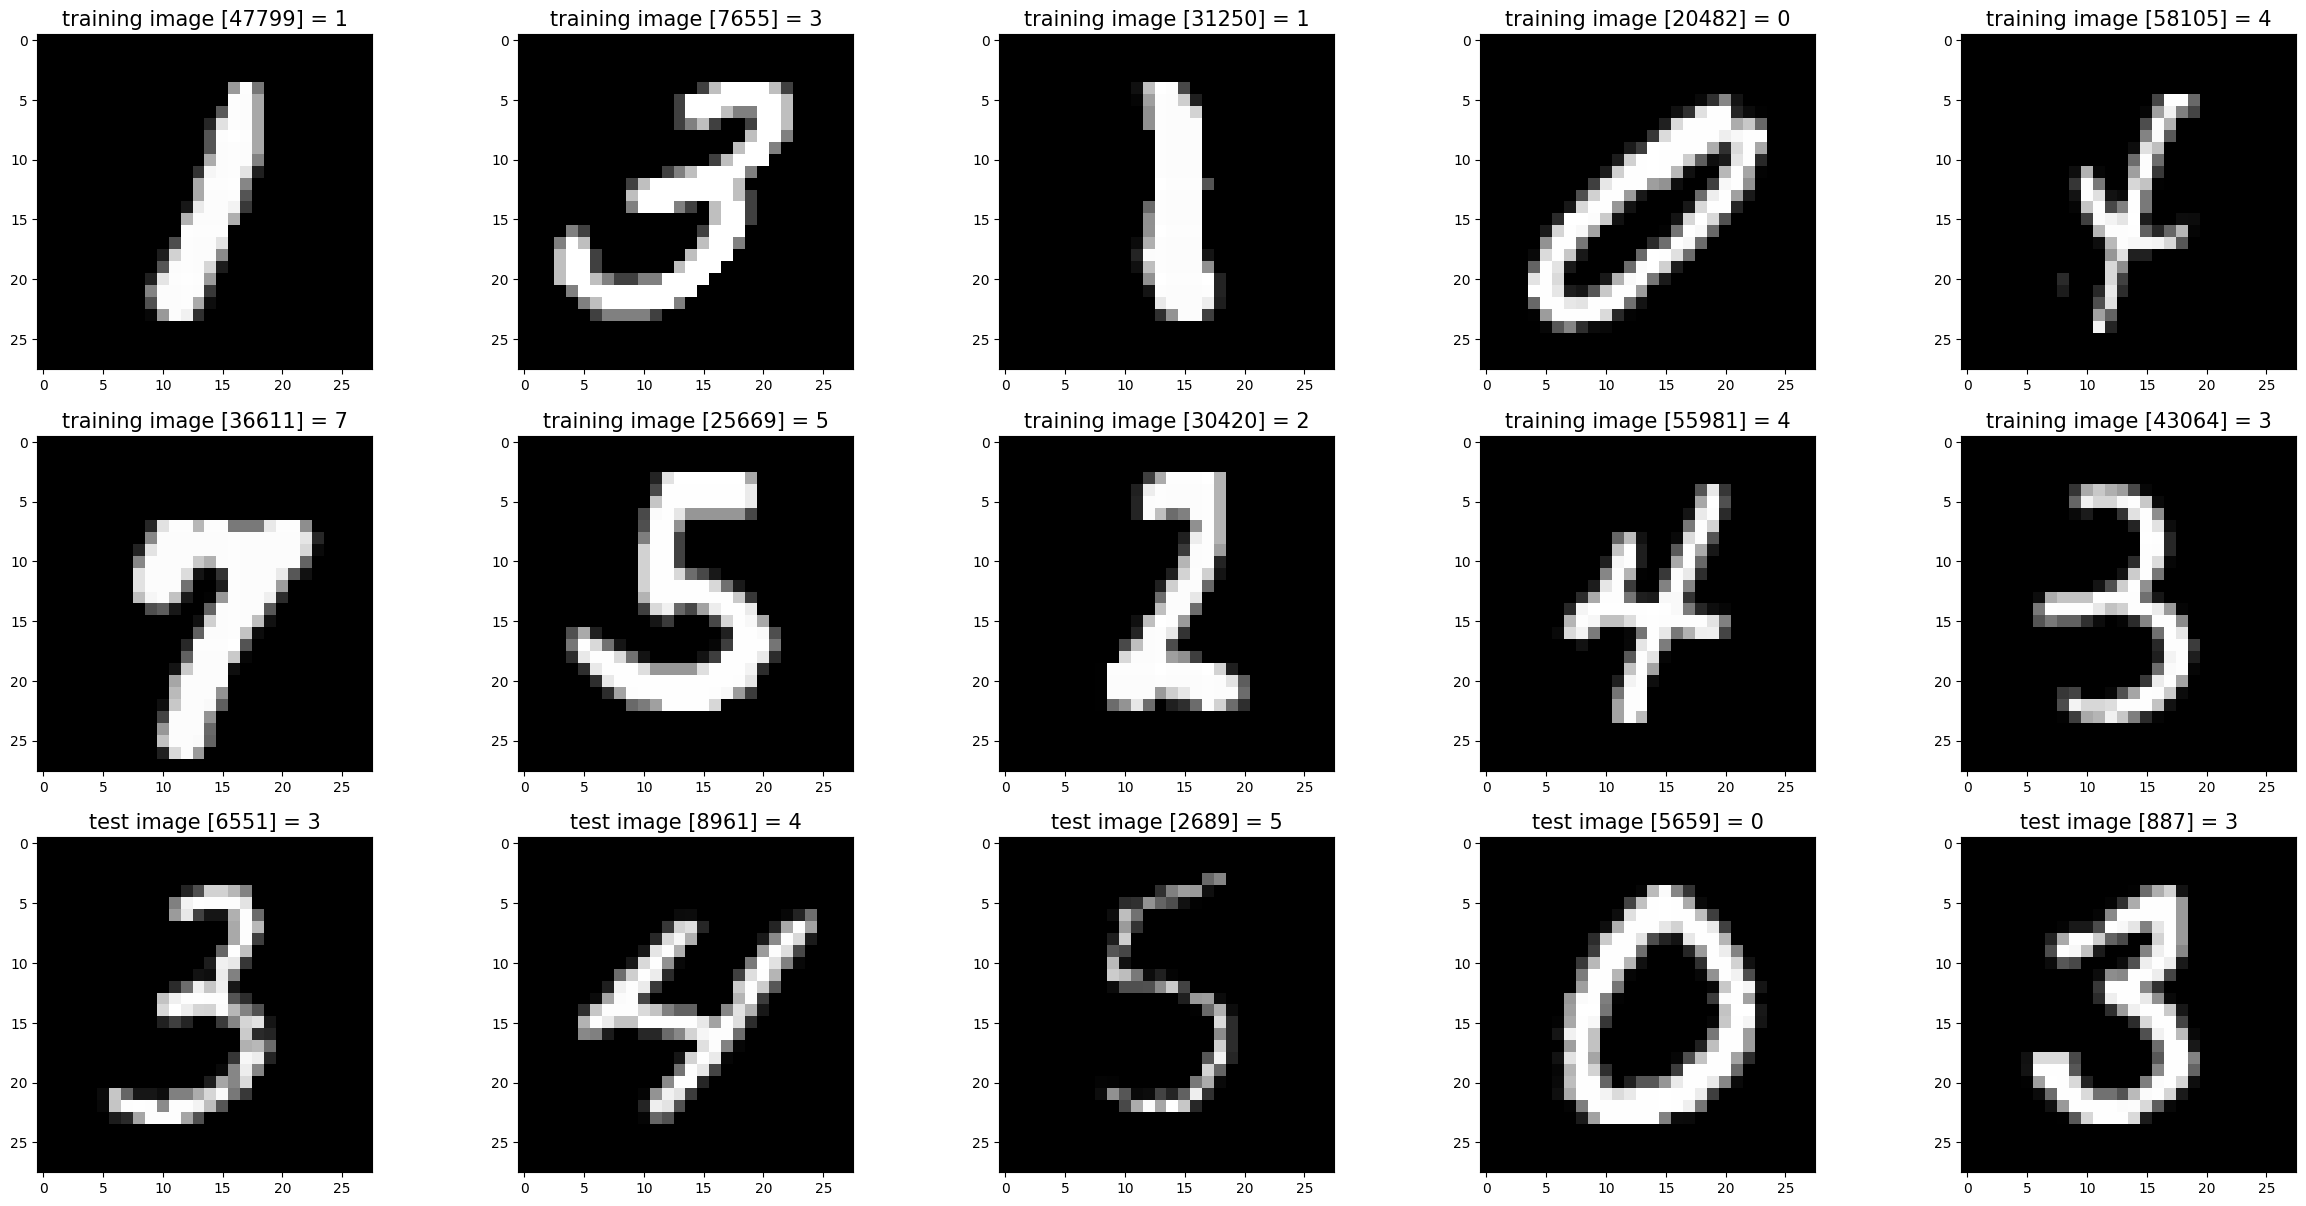

In [ ]:
# Verify Reading Dataset via MnistDataloader class

# Import necessary libraries
import random  # For generating random numbers
import matplotlib.pyplot as plt  # For plotting images

# Set file paths based on added MNIST Datasets
dataset_path = '/content/drive/My Drive/mnist_dataset'  # Path to the dataset directory
training_images_filepath = join(dataset_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')  # Path to training images file
training_labels_filepath = join(dataset_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')  # Path to training labels file
test_images_filepath = join(dataset_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')  # Path to test images file
test_labels_filepath = join(dataset_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')  # Path to test labels file

# Helper function to show a list of images with their relating titles
def show_images(images, title_texts):
    cols = 5  # Number of columns in the plot grid
    rows = int(len(images)/cols) + 1  # Number of rows in the plot grid
    plt.figure(figsize=(30,20))  # Set the figure size
    index = 1  # Initialize index for subplot
    for x in zip(images, title_texts):  # Repeat over pairs of images and titles
        image = x[0]  # Extract the image
        title_text = x[1]  # Extract the title text
        plt.subplot(rows, cols, index)  # Create subplot
        plt.imshow(image, cmap=plt.cm.gray)  # Display the image
        if (title_text != ''):  # If title text is not empty
            plt.title(title_text, fontsize = 15);  # Set the title
        index += 1  # Increment index

# Load MINST dataset using the MnistDataloader class
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()  # Load data

# Show some random training and test images
images_2_show = []  # Initialize list to store images to be displayed
titles_2_show = []  # Initialize list to store titles for images
for i in range(0, 10):  # Repeat to select 10 random training images
    r = random.randint(1, 60000)  # Generate a random index
    images_2_show.append(x_train[r])  # Add the image to the list
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))  # Add the title to the list

for i in range(0, 5):  # Repeat to select 5 random test images
    r = random.randint(1, 10000)  # Generate a random index
    images_2_show.append(x_test[r])  # Add the image to the list
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))  # Add the title to the list

# Display the selected images
show_images(images_2_show, titles_2_show)

The task involves training a model to classify images of handwritten digits (0 to 9) into their respective numerical labels. Our task description is to build a convolutional neural network (CNN), to classify these handwritten digits accurately. The goal is to train the model to accurately recognize and classify digits from unseen images.

In [ ]:
# Import TensorFlow library
import tensorflow as tf  # TensorFlow is a powerful open-source machine learning library developed by Google

# TensorFlow is being used in this project because:
# 1. TensorFlow provides a high-level neural networks API (tf.keras) that simplifies the process of building and training neural networks.
# 2. It offers efficient computation with support for both CPU and GPU acceleration, allowing for faster training times on compatible hardware.
# 3. It provides tools for visualization, model deployment, and production-scale serving, enabling seamless integration into real-world applications.


# Data preprocessing
Data preprocessing is essential before feeding it into machine learning models:
Converting the data to NumPy arrays ensures its compatibility with TensorFlow.
This conversion allows for easy integration of the data with other machine learning libraries and frameworks.


In [ ]:
# Convert lists to NumPy arrays for compatibility with TensorFlow
x_train = np.array(x_train)  # Convert the training images list to a NumPy array
x_test = np.array(x_test)    # Convert the test images list to a NumPy array

# Data Normalization

These comments explain the normalization of pixel values, reshaping of images, and conversion of labels to one-hot encoded vectors, highlighting their importance for preparing the data for training TensorFlow models.

In [ ]:
# Normalize pixel values by scaling them to the range [0, 1]
x_train_normalized = x_train / 255.0  # Divide each pixel value by 255 to scale them between 0 and 1
x_test_normalized = x_test / 255.0    # Normalize test images using the same scaling factor as the training images

# Reshape images to the desired format for TensorFlow models
# TensorFlow models typically expect inputs in the shape (num_samples, height, width, channels)
# Here, we reshape the images to (num_samples, 28, 28, 1) where 1 represents the grayscale channel
x_train_reshaped = x_train_normalized.reshape(-1, 28, 28, 1)  # Reshape training images
x_test_reshaped = x_test_normalized.reshape(-1, 28, 28, 1)    # Reshape test images

# Convert labels to one-hot encoded vectors if necessary
# One-hot encoding is a common technique used for categorical data where each label is represented as a binary vector
# Each element in the vector corresponds to a class, and the element corresponding to the true class is set to 1 while others are set to 0
num_classes = 10  # Total number of classes (digits 0 to 9 in the MNIST dataset)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)  # Convert training labels to one-hot encoded vectors
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)    # Convert test labels to one-hot encoded vectors

#Model Building and Evaluation

This section consists of the construction of the CNN model, including the definition of layers, compilation of the model with optimizer and loss function, and training of the model using the training data.






In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer with 32 filters and ReLU activation
    layers.MaxPooling2D((2, 2)),  # Max pooling layer to downsample the feature maps
    layers.Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and ReLU activation
    layers.MaxPooling2D((2, 2)),  # Max pooling layer to downsample the feature maps
    layers.Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and ReLU activation
    layers.Flatten(),  # Flatten layer to convert the 2D feature maps into a 1D feature vector
    layers.Dense(64, activation='relu'),  # Fully connected dense layer with 64 neurons and ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation
])

#Model Compilation

The model is compiled using the Adam optimizer, which is an adaptive learning rate optimization algorithm.
The loss function used is categorical cross-entropy, suitable for multi-class classification problems.
Accuracy is chosen as the primary metric to monitor during training.

#Model Training

The model is trained using the training data (x_train_reshaped and y_train_one_hot) for 5 epochs.
Validation data (x_test_reshaped and y_test_one_hot) is used to evaluate the model's performance after each epoch.

In [ ]:
# Compile the model
model.compile(optimizer='adam',  # Adam optimizer for gradient descent
              loss='categorical_crossentropy',  # Cross-entropy loss function for multi-class classification
              metrics=['accuracy'])  # Metric to monitor during training

# Train the model
history = model.fit(x_train_reshaped, y_train_one_hot, epochs=5, validation_data=(x_test_reshaped, y_test_one_hot))

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1471 - accuracy: 0.9546 - val_loss: 0.0510 - val_accuracy: 0.9832
Epoch 2/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0454 - accuracy: 0.9863 - val_loss: 0.0396 - val_accuracy: 0.9887
Epoch 3/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0339 - accuracy: 0.9890 - val_loss: 0.0362 - val_accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0287 - val_accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0316 - val_accuracy: 0.9908


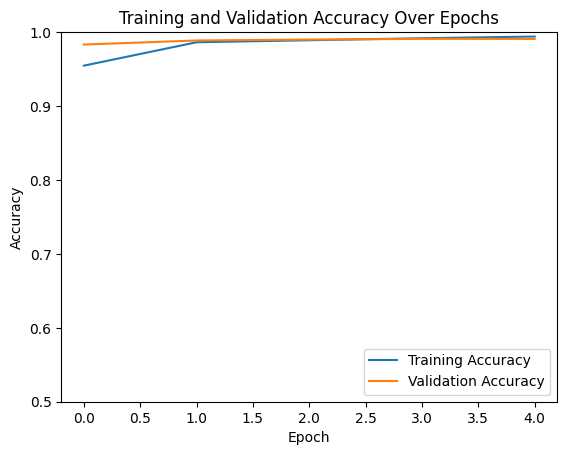

In [ ]:
# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Set labels and limits
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])

# Add legend
plt.legend(loc='lower right')

# Add plot title
plt.title('Training and Validation Accuracy Over Epochs')

# Show plot
plt.show()

In [ ]:
# Evaluate the trained model on the test data to assess its performance

# Use the evaluate method of the model to calculate the loss and accuracy on the test data
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test_one_hot)

# Print the test accuracy
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0316 - accuracy: 0.9908
Test accuracy: 0.9908000230789185


The model achieved a test accuracy of approximately 99%. This means that the model correctly classified about 99.11% of the images in the test dataset. A high test accuracy indicates that the model generalizes well to unseen data, which is essential for its effectiveness in real-world applications.The model performs well in classifying handwritten digits from the MNIST dataset, showing its ability to accurately identify digits using the given images.

Model Architecture and summary.

In [ ]:
# Call the summary method to get the model architecture and parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
pip install pydot graphviz

In [ ]:
from tensorflow.keras.utils import plot_model

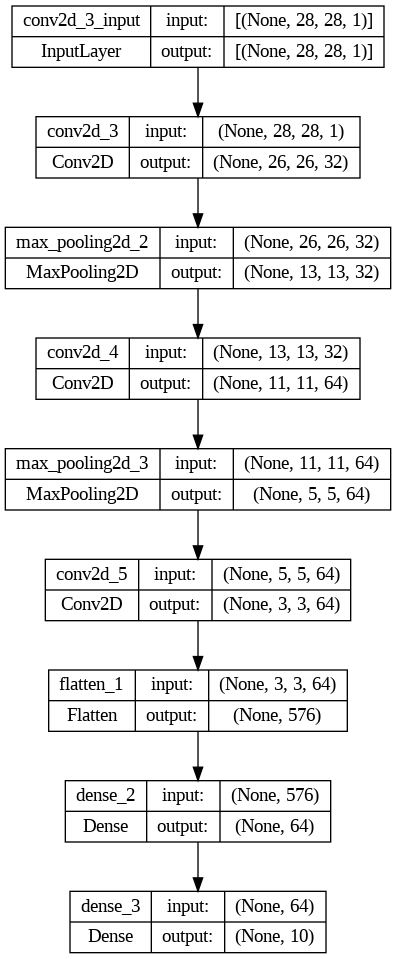

In [ ]:
# Plot the model architecture and save it as an image file
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

#Model evaluation

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Randomly Select Test Images for Visualization

import numpy as np

# Define the number of random indices to select
num_images_to_plot = 5

# Generate random indices for selecting test images
random_indices = np.random.choice(len(x_test), num_images_to_plot, replace=False)

In [ ]:
# Extract true labels for randomly selected test images
true_labels = [y_test[i] for i in random_indices]

In [ ]:
import numpy as np

# Convert y_test to a NumPy array
y_test_np = np.array(y_test)

# Convert random_indices to a NumPy array
random_indices_np = np.array(random_indices)

# Index y_test_np with random_indices_np
true_labels = y_test_np[random_indices_np]


We visualize some test images along with their predicted labels to understand the model's performance in more detail

1/1 [==============================] - 0s 78ms/step


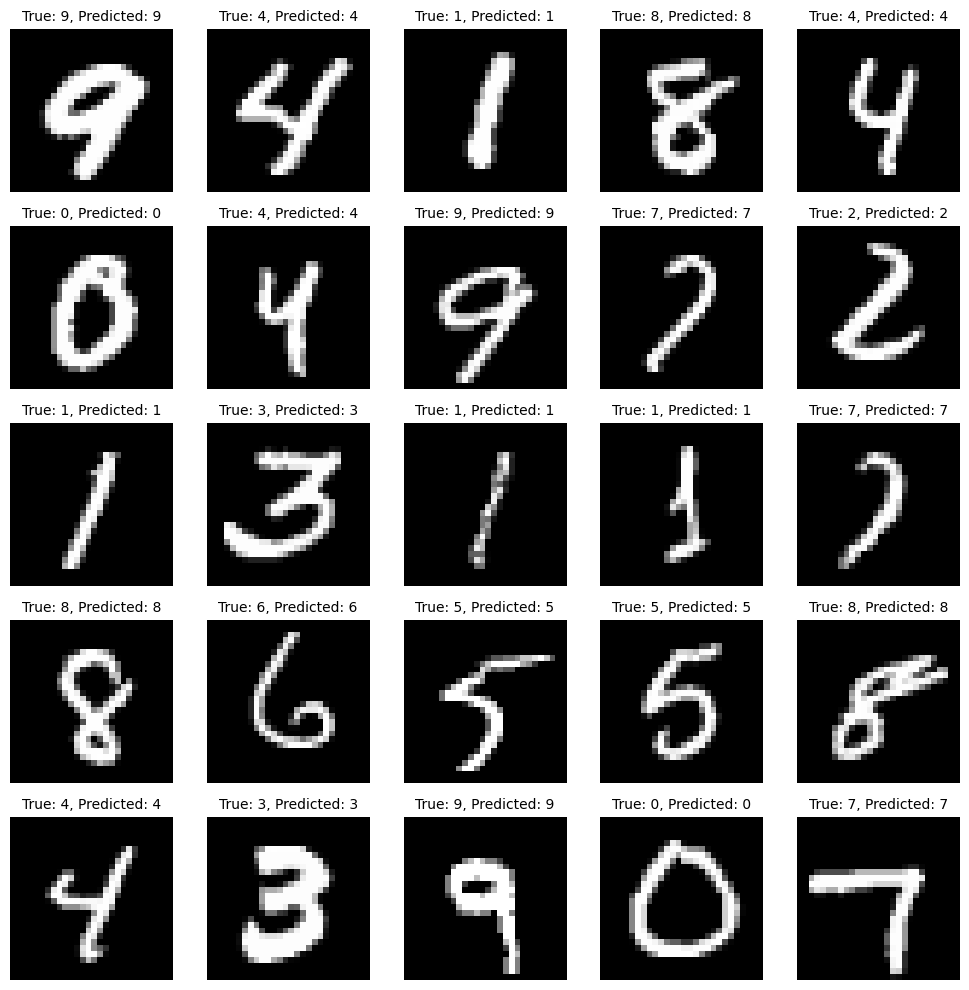

In [ ]:
# Function to plot images with labels and predictions
def plot_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}', fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Select random test images
num_images_to_plot = 25
random_indices = np.random.choice(len(x_test), num_images_to_plot, replace=False)
test_images = x_test[random_indices]

# Extract true labels for randomly selected test images
true_labels = []
for i in random_indices:
    true_labels.append(y_test[i])

# Get model predictions
predicted_probabilities = model.predict(test_images)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Plot the images with true and predicted labels
plot_images(test_images, true_labels, predicted_labels)

Further Model evaluation

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(true_labels, predicted_labels, zero_division=1)

# Print classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



This classification report provides metrics for assessing the performance of a classification model on a dataset with 10 classes (labels 0 through 9).

Precision is perfect (1.00) for all classes, showing that there were no false positives for any class.

Recall is perfect (1.00) for all classes, showing that there were no false negatives for any class.
F1-score is perfect (1.00) for all classes, showing excellent performance.


Overall, the classification report shows that the model achieved perfect accuracy (1.00) across all metrics and classes, with no errors in classification.







Let's carry out further error analysis.

Error analysis is a crucial step in evaluating the performance of a machine learning model. Its purpose is to identify any type of error made by the model and gain insights into why these errors occur.

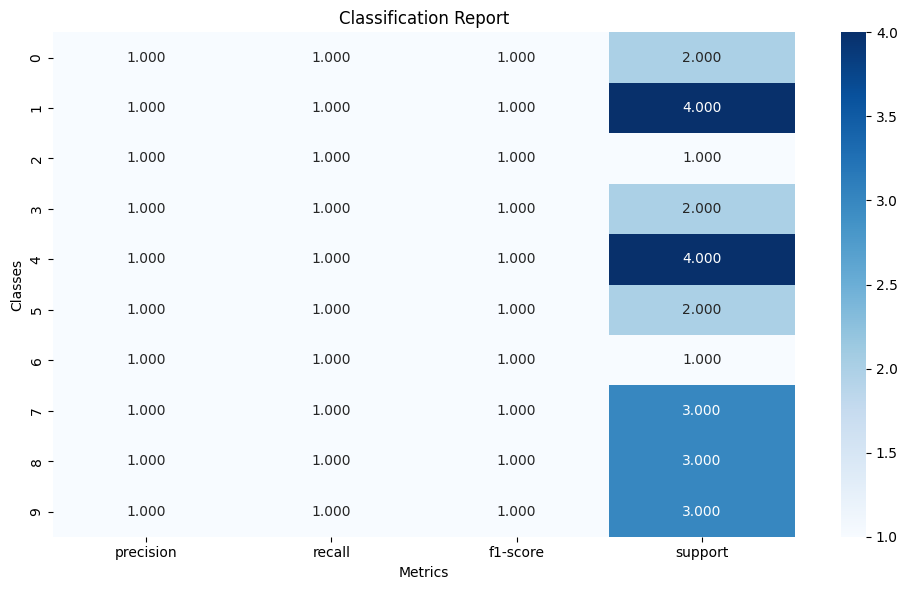

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate classification report
report = classification_report(true_labels, predicted_labels, output_dict=True)

# Parse classification report and extract metrics
metrics = {'precision': [], 'recall': [], 'f1-score': [], 'support': []}
classes = []
for cls, scores in report.items():
    if cls.isdigit():
        classes.append(int(cls))
        metrics['precision'].append(scores['precision'])
        metrics['recall'].append(scores['recall'])
        metrics['f1-score'].append(scores['f1-score'])
        metrics['support'].append(scores['support'])

# Create DataFrame from metrics
df = pd.DataFrame(metrics, index=classes)

# Visualize metrics using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt='.3f')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.tight_layout()

# Save visualization as PNG image
plt.savefig('classification_report.png')


# Error analysis

In [ ]:
# Find misclassified images
misclassified_indices = [i for i, (true_label, predicted_label) in enumerate(zip(true_labels, predicted_labels)) if true_label != predicted_label]
misclassified_images = [test_images[i] for i in misclassified_indices]
misclassified_true_labels = [true_labels[i] for i in misclassified_indices]
misclassified_predicted_labels = [predicted_labels[i] for i in misclassified_indices]

# Print the number of misclassified images
print(f"Number of misclassified images: {len(misclassified_images)}")

Number of misclassified images: 0


There are no misclassified images.

Misclassification occurs when the predicted label by the model does not match the true label of the image.

These misclassifications can provide insights into the model's weaknesses and areas for improvement.



The commented code lines below can/would have been used if there were 1 or more misclassified images.

In [ ]:
# Check if there are misclassified images
if len(misclassified_indices) > 0:
    # Retrieve the misclassified image, true label, and predicted label
    misclassified_index = misclassified_indices[0]  # Choose the first misclassified image
    misclassified_image = misclassified_images[misclassified_index]
    true_label = misclassified_true_labels[misclassified_index]
    predicted_label = misclassified_predicted_labels[misclassified_index]

    # Plot the misclassified image
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()
else:
    print("There are no misclassified images.")

There are no misclassified images.


In [ ]:
#import matplotlib.pyplot as plt

#Choose the index of the misclassified image you want to visualize
#misclassified_index = misclassified_indices[0]  # For example, let's choose the first misclassified image

#Retrieve the misclassified image, true label, and predicted label
#misclassified_image = misclassified_images[misclassified_index]
#true_label = misclassified_true_labels[misclassified_index]
#predicted_label = misclassified_predicted_labels[misclassified_index]

# Plot the misclassified image
#plt.imshow(misclassified_image, cmap='gray')
#plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
#Plt.axis('off')
#plt.show()

In [ ]:

# Define a function to visualize images
#def visualize_images(images, labels, predicted_labels, index):
    #plt.figure(figsize=(10, 5))
    #for i in range(len(index)):
        #plt.subplot(1, len(index), i + 1)
        #plt.imshow(images[index[i]], cmap='gray')
        #plt.title(f'True Label: {labels[index[i]]}\nPredicted Label: {predicted_labels[index[i]]}')
        #plt.axis('off')
    #plt.show()

# Plot the misclassified image along with its true label and predicted label
#visualize_images(misclassified_images, misclassified_true_labels, misclassified_predicted_labels, [0])

# Compare with other instances of the true label and predicted label
#true_label_0_indices = [i for i, label in enumerate(misclassified_true_labels) if label == 0]
#predicted_label_9_indices = [i for i, label in enumerate(misclassified_predicted_labels) if label == 9]

#print(f"Indices of true label 0: {true_label_0_indices}")
#print(f"Indices of predicted label 9: {predicted_label_9_indices}")

#Confusion matrix

A confusion matrix is used to evaluate the performance of a predictive model. It allows for a detailed analysis of the model's performance by providing a breakdown of correct and incorrect predictions across different class

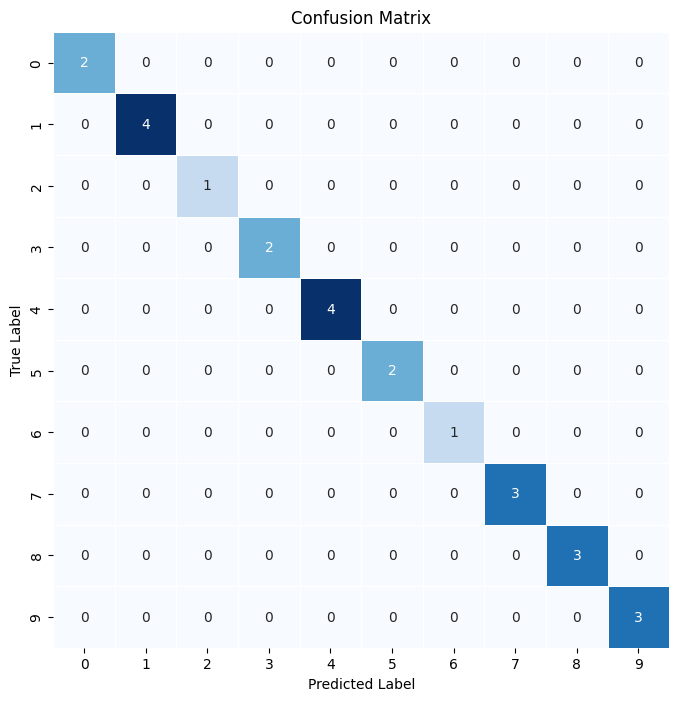

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true labels and predicted labels
y_true = [0, 1, 2, 1, 0, 2, 2, 1, 0]
y_pred = [0, 1, 2, 1, 0, 2, 1, 1, 0]

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3 0 0]
 [0 3 0]
 [0 1 2]]


The actual classes are represented by the rows, and the predicted classes are represented by the columns.


The matrix has dimensions 3x3, indicating that we have three classes in the classification problem.
The diagonal elements (from top-left to bottom-right) represent the number of correct predictions (True Positives) for each class:

Class 0: 3 correct predictions

Class 1: 3 correct predictions

Class 2: 2 correct predictions

Off-diagonal elements represent incorrect predictions:

Row 1, Column 2: There are no false positive predictions for Class 1.

Row 2, Column 1: There is 1 false negative prediction for Class 2.

Row 3, Column 1: There is 1 false positive prediction for Class 3.

#Conclusion

This project covers all the essential aspects of the original assignment problem, which was to analyze the MNIST dataset using a Convolutional Neural Network (CNN).



Here's a brief assessment:


Introduction and Overview: This project includes an introduction and overview, providing context about the MNIST dataset, its importance, and the objectives of the assignment.


Dataset Description and Setup: Details about the MNIST dataset are provided, its source, location, and file structure. The necessary steps to set up the dataset in Google Colab for analysis are also outlined.


Data Preprocessing: The code shows essential data preprocessing steps, such as converting data to NumPy arrays, normalizing pixel values, reshaping images, and converting labels to one-hot encoded vectors. These steps are essential for preparing the data for model training.


Model Building and Training: A CNN model using TensorFlow's Keras API is constructed, it is compiled with the appropriate optimizer and loss function, and trained using the training data. The training process is visualized with training/validation loss and accuracy metrics.


Model Evaluation: The trained model is evaluated using the test dataset, and its performance metrics, including accuracy, are reported. Additionally, I provide a classification report to assess the model's precision, recall, and F1-score for each class.


Error Analysis: Error analysis is conducted by visualizing misclassified images (if any) and generating a confusion matrix to understand the model's performance in more detail.


Overall, This project effectively addresses the original assignment problem by implementing a CNN model to classify handwritten digits from the MNIST dataset and thoroughly analyzing its performance. The content is well-structured, and the code is appropriately commented, making it easy to follow. Additionally, I've covered key aspects such as data preprocessing, model building, evaluation, and error analysis, which are crucial components of any machine learning project.